In [9]:
import pandas as pd

# Load the dataset
file_path = "C:\Users\prava\Downloads\Sadhuko\SEM5\ML\data.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

## A1_a)

In [21]:
def summation(inputs, weights, bias):
    return sum(i * w for i, w in zip(inputs, weights)) + bias

# Example: Using first row of dataset for inputs
weights = [0.2, -0.5, 0.3]  # Example weights
bias = 1.0  # Example bias
inputs = data[['radius_mean', 'texture_mean', 'perimeter_mean']].iloc[0].values
output = summation(inputs, weights, bias)
print(f"Summation Output: {output}")


Summation Output: 36.248


## A1_b)

In [51]:
import math

# Step Function
def step_function(x):
    return 1 if x >= 0 else 0

# Bipolar Step Function
def bipolar_step_function(x):
    return 1 if x >= 0 else -1

# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# TanH Function
def tanh(x):
    return math.tanh(x)

# ReLU Function
def relu(x):
    return max(0, x)

# Leaky ReLU Function
def leaky_relu(x, alpha=0.01):
    return x if x >= 0 else alpha * x

# Test activation functions using the summation result
activation_step_function = step_function(output)
print(f"Step Activation Output: {activation_step_function}")

activation_bipolar_step_function = bipolar_step_function(output)
print(f"Bipolar step Activation Output: {activation_bipolar_step_function}")

activation_sigmoid = sigmoid(output)
print(f"Sigmoid Activation Output: {activation_sigmoid}")

activation_tanh = tanh(output)
print(f"Tanh Activation Output: {activation_tanh}")

activation_relu = relu(output)
print(f"Relu Activation Output: {activation_relu}")

activation_leaky_relu = leaky_relu(output)
print(f"Leaky Relu Activation Output: {activation_leaky_relu}")



Step Activation Output: 1
Bipolar step Activation Output: 1
Sigmoid Activation Output: 0.9999999999999998
Tanh Activation Output: 1.0
Relu Activation Output: 36.248
Leaky Relu Activation Output: 36.248


## A1_c)

In [54]:
# Comparator for Error Calculation
def comparator(predicted, actual):
    return actual - predicted

# Example: Target = 1 (for Malignant)
actual = 1  # Example target for Malignant
predicted = step_function(output)
error = comparator(predicted, actual)
print(f"Error: {error}")


Error: 0


## A2

In [58]:
# AND Gate Logic Example
def perceptron_and(inputs, weights, bias, learning_rate=0.05, epochs=1000):
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            summation_output = summation(inputs[i], weights, bias)
            predicted = step_function(summation_output)
            error = comparator(predicted, inputs[i][-1])
            total_error += error**2
            # Update weights and bias
            for j in range(len(weights)):
                weights[j] += learning_rate * error * inputs[i][j]
            bias += learning_rate * error
        if total_error <= 0.002:  # Convergence criteria
            break
    return weights, bias, epoch

# AND gate inputs
and_gate_inputs = [[0, 0, 0], [0, 1, 0], [1, 0, 0], [1, 1, 1]]
weights = [0.2, -0.75]  # Initial weights
bias = 10  # Initial bias

weights, bias, epochs_to_converge = perceptron_and(and_gate_inputs, weights, bias)
print(f"Weights: {weights}, Bias: {bias}, Epochs to Converge: {epochs_to_converge}")


Weights: [0.1000000000000001, 0.05000000000000032], Bias: -0.10000000000000765, Epochs to Converge: 129


## A3


In [61]:
# Repeat A1 with different activation functions and compare convergence times

def perceptron_with_activation(inputs, weights, bias, activation_func, learning_rate=0.05, epochs=1000):
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(inputs)):
            summation_output = summation(inputs[i], weights, bias)
            predicted = activation_func(summation_output)
            error = comparator(predicted, inputs[i][-1])
            total_error += error**2
            # Update weights and bias
            for j in range(len(weights)):
                weights[j] += learning_rate * error * inputs[i][j]
            bias += learning_rate * error
        if total_error <= 0.002:  # Convergence criteria
            break
    return weights, bias, epoch

# Activation Functions for AND gate
weights = [0.2, -0.75]
bias = 10
learning_rate = 0.05

for activation in [step_function, bipolar_step_function, sigmoid, relu]:
    weights, bias, epochs = perceptron_with_activation(and_gate_inputs, weights, bias, activation, learning_rate)
    print(f"Activation: {activation.__name__}, Weights: {weights}, Bias: {bias}, Epochs: {epochs}")


Activation: step_function, Weights: [0.1000000000000001, 0.05000000000000032], Bias: -0.10000000000000765, Epochs: 129
Activation: bipolar_step_function, Weights: [0.1000000000000001, 0.05000000000000032], Bias: -0.10000000000000765, Epochs: 999
Activation: sigmoid, Weights: [4.269513023364578, 4.263876593860676], Bias: -6.58132321326526, Epochs: 999
Activation: relu, Weights: [3.964458104504183, 3.9588216750002814], Bias: -6.886378132125656, Epochs: 19


## A4

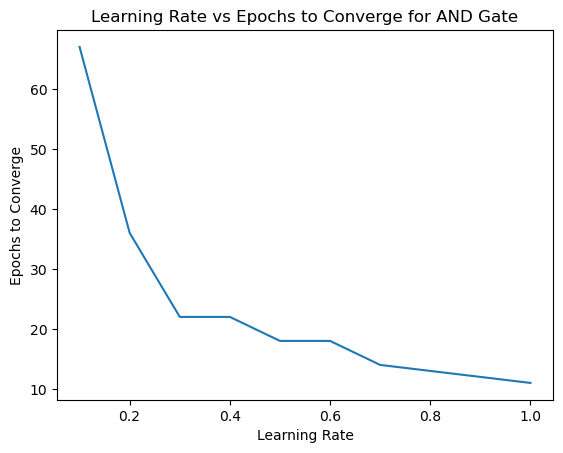

In [66]:
# Varying Learning Rate
learning_rates = [0.1 * i for i in range(1, 11)]
epochs_required = []

for lr in learning_rates:
    weights = [0.2, -0.75]
    bias = 10
    _, _, epochs = perceptron_and(and_gate_inputs, weights, bias, learning_rate=lr)
    epochs_required.append(epochs)

# Plot the learning rate vs epochs to converge
import matplotlib.pyplot as plt

plt.plot(learning_rates, epochs_required)
plt.xlabel('Learning Rate')
plt.ylabel('Epochs to Converge')
plt.title('Learning Rate vs Epochs to Converge for AND Gate')
plt.show()


## A5

In [68]:
# XOR Gate Inputs
xor_gate_inputs = [[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

# Repeat A1 for XOR gate
weights, bias, epochs_to_converge = perceptron_and(xor_gate_inputs, weights, bias)
print(f"Weights: {weights}, Bias: {bias}, Epochs to Converge for XOR: {epochs_to_converge}")


Weights: [-0.1000000000000003, -0.10000000000000052], Bias: 0.09999999999999236, Epochs to Converge for XOR: 999


## A6

In [73]:
# Customer Transaction Data
customer_data = [
    [20, 6, 2, 1], [16, 3, 6, 1], [27, 6, 2, 1], [19, 1, 2, 0], [24, 4, 2, 1],
    [22, 1, 5, 0], [15, 4, 2, 1], [18, 4, 2, 1], [21, 1, 4, 0], [16, 2, 4, 0]
]

# Use Sigmoid Activation for Perceptron
weights = [0.1, 0.2, -0.3]  # Example weights
bias = 1.0  # Example bias

weights, bias, epochs = perceptron_with_activation(customer_data, weights, bias, sigmoid, learning_rate=0.05)
print(f"Weights: {weights}, Bias: {bias}, Epochs to Converge for Customer Data: {epochs}")


Weights: [-1.3336535240217644, 8.843401928615727, -0.22341645496198342], Bias: 0.7969978472159969, Epochs to Converge for Customer Data: 127


## A7

In [76]:
import numpy as np

# Use pseudo-inverse to calculate weights
X = np.array([row[:3] for row in customer_data])
y = np.array([row[3] for row in customer_data])
weights_pseudo = np.dot(np.linalg.pinv(X), y)
print(f"Pseudo-inverse Weights: {weights_pseudo}")


Pseudo-inverse Weights: [-0.0196597   0.26431172  0.04554979]


## A8

In [78]:
import numpy as np

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# AND gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([[0], [0], [0], [1]])  # AND gate outputs

# Initialize weights and bias for 2-layer neural network
input_layer_neurons = X.shape[1]  # 2 inputs
hidden_layer_neurons = 2  # 2 neurons in hidden layer
output_neurons = 1  # 1 output (AND gate result)

# Weights initialization
np.random.seed(42)
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Set learning rate and epochs
learning_rate = 0.05
epochs = 1000

# Training the neural network
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_activation = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)
    
    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)
    
    # Calculate error (mean squared error)
    error = y - predicted_output
    
    # Backpropagation
    # Output layer
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    # Hidden layer
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Stop if error is less than 0.002
    if np.mean(np.square(error)) < 0.002:
        break

print(f"Weights (input to hidden): {weights_input_hidden}")
print(f"Weights (hidden to output): {weights_hidden_output}")
print(f"Bias (hidden): {bias_hidden}")
print(f"Bias (output): {bias_output}")
print(f"Epochs to converge: {epoch}")
print(f"Final Output: {predicted_output}")


Weights (input to hidden): [[0.35426245 0.8739027 ]
 [0.70801885 0.5542541 ]]
Weights (hidden to output): [[ 0.27351534]
 [-0.2888641 ]]
Bias (hidden): [[0.09929775 1.15169996]]
Bias (output): [[-0.94380849]]
Epochs to converge: 999
Final Output: [[0.26508702]
 [0.26909255]
 [0.26273347]
 [0.26811816]]


## A9

In [80]:
# XOR gate inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([[0], [1], [1], [0]])  # XOR gate outputs

# Initialize weights and biases (same as before)
input_layer_neurons = X.shape[1]  # 2 inputs
hidden_layer_neurons = 2  # 2 neurons in hidden layer
output_neurons = 1  # 1 output (XOR gate result)

# Reinitialize weights for XOR gate
np.random.seed(42)
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Training the neural network
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_activation = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)
    
    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)
    
    # Calculate error
    error = y - predicted_output
    
    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Stop if error is less than 0.002
    if np.mean(np.square(error)) < 0.002:
        break

print(f"Weights (input to hidden): {weights_input_hidden}")
print(f"Weights (hidden to output): {weights_hidden_output}")
print(f"Bias (hidden): {bias_hidden}")
print(f"Bias (output): {bias_output}")
print(f"Epochs to converge: {epoch}")
print(f"Final Output: {predicted_output}")


Weights (input to hidden): [[0.34703483 0.93399821]
 [0.71572701 0.56940489]]
Weights (hidden to output): [[-0.08130154]
 [ 0.01564564]]
Bias (hidden): [[0.04784409 0.8718028 ]]
Bias (output): [[0.05096991]]
Epochs to converge: 999
Final Output: [[0.5051003 ]
 [0.50204167]
 [0.50395685]
 [0.50102738]]


## A10

In [82]:
# XOR gate inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # XOR gate outputs with 2 nodes

# Initialize weights and biases for a 2-output perceptron
input_layer_neurons = X.shape[1]  # 2 inputs
hidden_layer_neurons = 2  # 2 neurons in hidden layer
output_neurons = 2  # 2 outputs

# Reinitialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Training the neural network
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_activation = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)
    
    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)
    
    # Calculate error
    error = y - predicted_output
    
    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    # Updating weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # Stop if error is less than 0.002
    if np.mean(np.square(error)) < 0.002:
        break

print(f"Weights (input to hidden): {weights_input_hidden}")
print(f"Weights (hidden to output): {weights_hidden_output}")
print(f"Bias (hidden): {bias_hidden}")
print(f"Bias (output): {bias_output}")
print(f"Epochs to converge: {epoch}")
print(f"Final Output: {predicted_output}")


Weights (input to hidden): [[0.19586171 1.07885866]
 [0.6572288  0.81684909]]
Weights (hidden to output): [[ 0.10516791 -0.46237367]
 [-0.24712274  0.45573103]]
Bias (hidden): [[0.62252522 0.61181735]]
Bias (output): [[ 0.10637225 -0.01156423]]
Epochs to converge: 999
Final Output: [[0.50363583 0.49576632]
 [0.49732778 0.49857474]
 [0.49268088 0.51308418]
 [0.49087705 0.50836344]]


## A11

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# AND gate inputs and outputs
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])  # AND gate outputs

# XOR gate inputs and outputs
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR gate outputs

# MLPClassifier for AND gate
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)
mlp_and.fit(X_and, y_and)
y_and_pred = mlp_and.predict(X_and)
print(f"AND Gate Predictions: {y_and_pred}")
print(f"Accuracy for AND Gate: {accuracy_score(y_and, y_and_pred)}")

# MLPClassifier for XOR gate
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000)
mlp_xor.fit(X_xor, y_xor)
y_xor_pred = mlp_xor.predict(X_xor)
print(f"XOR Gate Predictions: {y_xor_pred}")
print(f"Accuracy for XOR Gate: {accuracy_score(y_xor, y_xor_pred)}")


AND Gate Predictions: [0 0 0 0]
Accuracy for AND Gate: 0.75
XOR Gate Predictions: [1 1 1 1]
Accuracy for XOR Gate: 0.5


C:\Users\bhesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## A12

In [91]:
# Prepare the data
X_project = data[['radius_mean', 'texture_mean', 'perimeter_mean']]  # Example features
y_project = (data['diagnosis'] == 'M').astype(int)  # Binary classification: Malignant (1), Benign (0)

# Initialize the MLPClassifier
mlp_project = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=1000)

# Fit the model
mlp_project.fit(X_project, y_project)

# Predict on the same dataset
y_project_pred = mlp_project.predict(X_project)

# Calculate accuracy
accuracy = accuracy_score(y_project, y_project_pred)
print(f"Accuracy on Project Dataset: {accuracy}")


Accuracy on Project Dataset: 0.8980667838312829


C:\Users\bhesh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
